In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random

from sklearn.metrics import  classification_report
from sklearn.metrics import ConfusionMatrixDisplay

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score


%matplotlib inline 

In [65]:
import importlib
import ids_common
importlib.reload(ids_common)


<module 'ids_common' from '/mnt/d/stuff/univ/ids/ids_common.py'>

ML-EdgeIIoT-dataset

In [80]:
path_to_dataset = './dataset/Edge-IIoTset-dataset/Selected dataset for ML and DL/ML-EdgeIIoT-dataset.csv'
df  = ids_common.prepare_dataset(path_to_dataset)
df.to_csv('./stuff/prepared_dataset.csv')


drop: NA: 0, DUPS: 5604
drop: NA: 0, DUPS: 5604
dropna: NA: 0, DUPS: 5604
drop_duplicates: NA: 0, DUPS: 0
################################################################################
TARGET: "Attack_label"
Attack_label
1    128095
0     24101
Name: count, dtype: int64
--------------------------------------------------------------------------------
TARGET: "Attack_type"
Attack_type
Normal                   24101
DDoS_UDP                 14498
DDoS_ICMP                13096
DDoS_HTTP                10495
SQL_injection            10282
DDoS_TCP                 10247
Uploading                10214
Vulnerability_scanner    10062
Password                  9972
Backdoor                  9865
Ransomware                9689
XSS                       9543
Port_Scanning             8921
Fingerprinting             853
MITM                       358
Name: count, dtype: int64
################################################################################


In [ ]:
SEED = random.randint(0, 42424242)
SEED = 19884136
print(f'SEED = {SEED}')

target_label_2_class = 'Attack_label' # 0 indicates normal and 1 indicates attacks
target_label_15_class = 'Attack_type'

2 classes: Attack detection, classification Attack vs Normal 

In [84]:
def dataset_split(target):
    y = df[target]
    X = df.drop([target_label_2_class, target_label_15_class], axis=1, inplace=False)
    return train_test_split(X, y, test_size=0.4, random_state=SEED, stratify=y)

In [94]:
X_train, X_test, y_train, y_test = dataset_split(target_label_2_class)

print(f'X_train: {X_train.shape}, y_train: {y_train.shape}')
print(f'X_test: {X_test.shape}, y_test: {y_test.shape}')

X_train: (91317, 57), y_train: (91317,)
X_test: (60879, 57), y_test: (60879,)


Dummy classifier

True
[0.84165051 0.84165051 0.84161766]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      9640
           1       0.84      1.00      0.91     51239

    accuracy                           0.84     60879
   macro avg       0.42      0.50      0.46     60879
weighted avg       0.71      0.84      0.77     60879



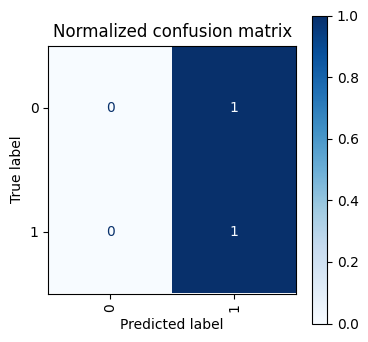

In [104]:
from sklearn.dummy import DummyClassifier

dummy_clf = DummyClassifier()
dummy_clf.fit(X_train, y_train)
print(any(dummy_clf.predict(X_train)))

print(cross_val_score(dummy_clf, X_train, y_train, cv=3, scoring="accuracy"))

dummy_clf.fit(X_train, y_train)
predicted = dummy_clf.predict(X_test)
print(classification_report(y_test, predicted, zero_division=0))

title='Normalized confusion matrix'

disp = ConfusionMatrixDisplay.from_estimator(
    dummy_clf,
    X_test,
    y_test,
    # display_labels=Attack_type_classes,
    cmap=plt.cm.Blues,
    normalize='true',
)
disp.ax_.set_title(title)
disp.figure_.set_size_inches(4, 4, forward=True)
plt.xticks(rotation=90)
plt.show()


In [97]:
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score


dt_cls = DecisionTreeClassifier(random_state=SEED)
print(cross_val_score(dt_cls, X_train, y_train, cv=3, scoring="accuracy"))

dt_cls.fit(X_train, y_train)
predicted = dt_cls.predict(X_test)
print(classification_report(y_test, predicted))

[0.96034692 0.96077401 0.96024837]
              precision    recall  f1-score   support

           0       0.88      0.88      0.88      9640
           1       0.98      0.98      0.98     51239

    accuracy                           0.96     60879
   macro avg       0.93      0.93      0.93     60879
weighted avg       0.96      0.96      0.96     60879



True
[0.84165051 0.84165051 0.84161766]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      9640
           1       0.84      1.00      0.91     51239

    accuracy                           0.84     60879
   macro avg       0.42      0.50      0.46     60879
weighted avg       0.71      0.84      0.77     60879



In [74]:


predicted = clf.predict(X_test)
accuracy = accuracy_score(predicted, Y_test)
print(f'Accuracy: {accuracy}')

print(classification_report(Y_test, predicted))

for imp, col in sorted(list(zip(clf.feature_importances_, X_train.columns)), reverse=True):
    if imp > 0:
        print(imp, col)


Accuracy: 0.9611688759670822
              precision    recall  f1-score   support

           0       0.88      0.88      0.88      9640
           1       0.98      0.98      0.98     51239

    accuracy                           0.96     60879
   macro avg       0.93      0.93      0.93     60879
weighted avg       0.96      0.96      0.96     60879

0.5159635018936243 tcp.seq
0.18193353233341852 mqtt.msgtype
0.12207965153209976 tcp.ack
0.0961132117705829 tcp.checksum
0.0519635536539969 tcp.ack_raw
0.01255853639612604 tcp.connection.synack
0.009562251030948404 tcp.len
0.00834003900277496 tcp.flags
0.0012329763103924322 dns.retransmission
0.00012356154056777395 http.content_length
4.580920319718815e-05 tcp.connection.rst
3.281147149008948e-05 tcp.connection.syn
2.335728535315352e-05 arp.opcode
1.502969322358342e-05 udp.time_delta
1.1752650566799732e-05 tcp.flags.ack
2.443372516843757e-07 icmp.checksum
1.7473404672372135e-07 udp.stream
5.160338696952419e-09 icmp.seq_le


15 classes

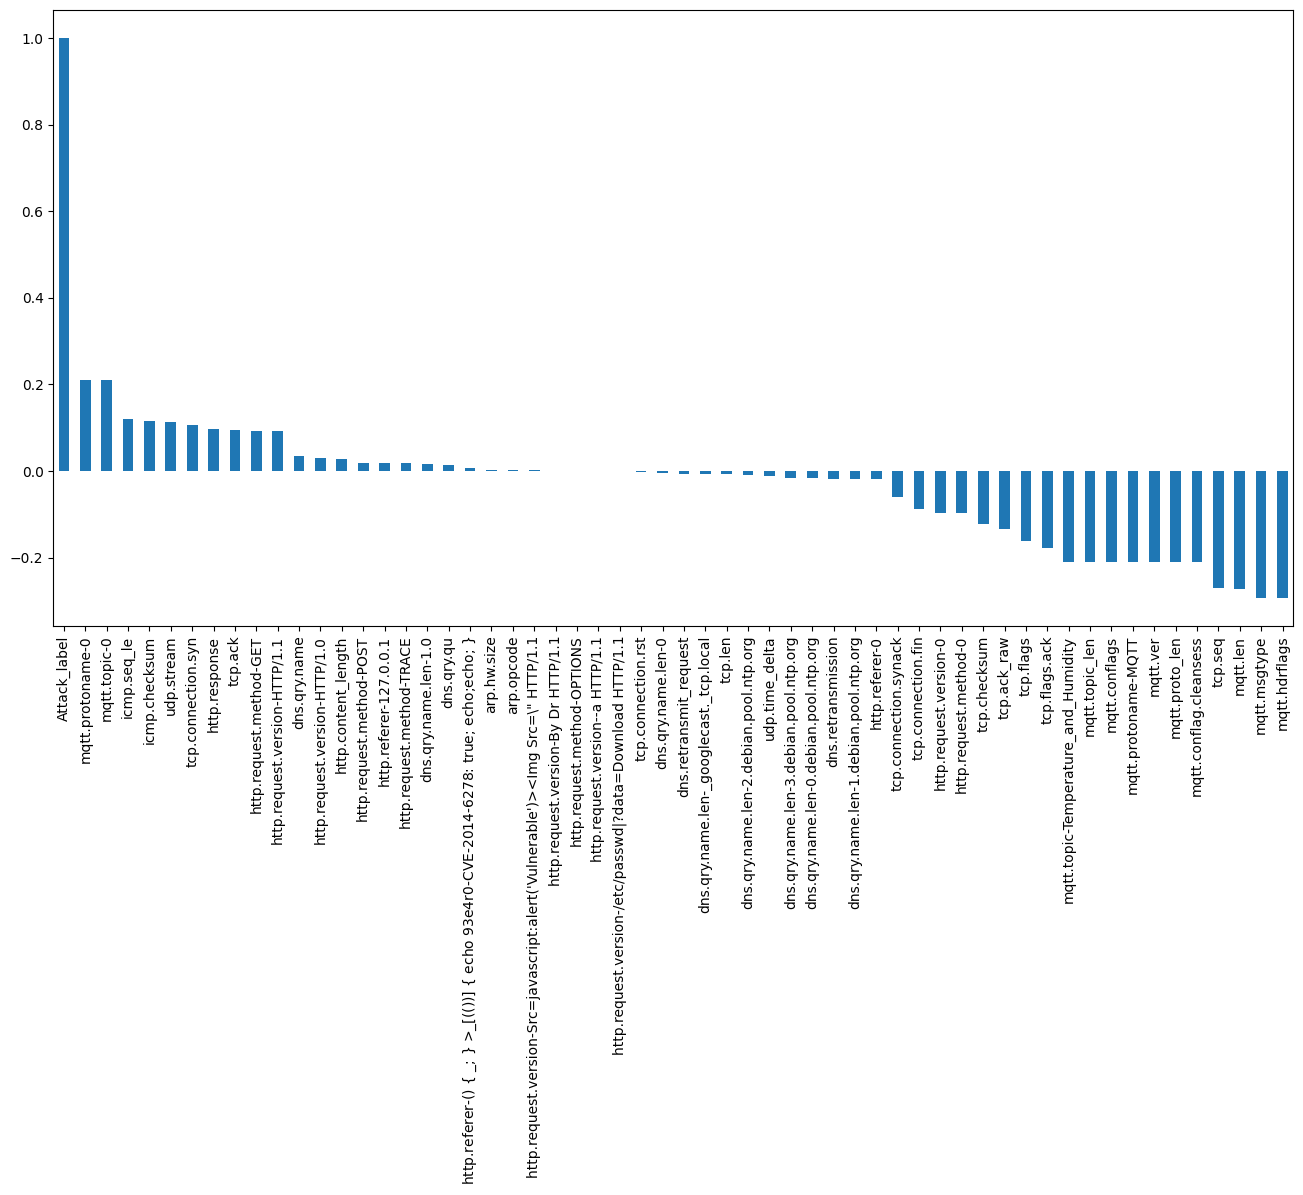

Attack_label                                                                         1.000000
mqtt.protoname-0                                                                     0.209794
mqtt.topic-0                                                                         0.209455
icmp.seq_le                                                                          0.121136
icmp.checksum                                                                        0.116376
udp.stream                                                                           0.114264
tcp.connection.syn                                                                   0.107291
http.response                                                                        0.096792
tcp.ack                                                                              0.094671
http.request.method-GET                                                              0.092900
http.request.version-HTTP/1.1                               

In [75]:

tdf = df.drop([target_label_15_class], axis=1, inplace=False).copy()
# # df[target_label_15_class_cat], Attack_type_classes = pd.factorize(df[target_label_15_class])
# tdf['attack-type'], Attack_type_classes = pd.factorize(df[target_label_15_class])


corr = tdf.corr()
corr = corr[target_label_2_class]

corr = corr.sort_values(ascending=False)

ax = corr.plot.bar(figsize=(16, 8))
# ax.bar_label(ax.containers[0])

plt.xticks(rotation=90)
plt.show()

print(corr)


In [76]:

Y = df[target_label_15_class]
X = df.drop([target_label_2_class, target_label_15_class], axis=1, inplace=False)

print(f'X: {X.shape}')
print(f'Y: {Y.shape}')

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.4, random_state=SEED, stratify=Y)

print(f'X_train: {X_train.shape}')
print(f'X_test: {X_test.shape}')

print(f'Y_train: {Y_train.shape}')
print(f'Y_test: {Y_test.shape}')


X: (152196, 57)
Y: (152196,)
X_train: (91317, 57)
X_test: (60879, 57)
Y_train: (91317,)
Y_test: (60879,)


In [77]:
clf = DecisionTreeClassifier(random_state=SEED)
clf.fit(X_train, Y_train)

DecisionTreeClassifier(random_state=19884136)

In [78]:
predicted = clf.predict(X_test)
accuracy = accuracy_score(predicted, Y_test)
print(f'Accuracy: {accuracy}')

print(classification_report(Y_test, predicted))

for imp, col in sorted(zip(clf.feature_importances_, X_train.columns), key=lambda x: x[0], reverse=True):
    if imp > 0:
        print(f'{imp:.5f}, {col}')


Accuracy: 0.8693145419602819
                       precision    recall  f1-score   support

             Backdoor       0.92      0.93      0.93      3946
            DDoS_HTTP       0.71      0.72      0.72      4198
            DDoS_ICMP       1.00      1.00      1.00      5238
             DDoS_TCP       1.00      1.00      1.00      4099
             DDoS_UDP       1.00      1.00      1.00      5799
       Fingerprinting       0.67      0.69      0.68       341
                 MITM       1.00      0.99      1.00       143
               Normal       0.88      0.88      0.88      9641
             Password       0.76      0.78      0.77      3989
        Port_Scanning       0.88      0.89      0.89      3568
           Ransomware       0.89      0.88      0.89      3876
        SQL_injection       0.75      0.73      0.74      4113
            Uploading       0.67      0.65      0.66      4086
Vulnerability_scanner       0.96      0.96      0.96      4025
                  XSS    

In [157]:



# from sklearn.metrics import ConfusionMatrixDisplay

# titles_options = [
#     ("Confusion matrix, without normalization", None),
#     ("Normalized confusion matrix", "true"),
# ]


# plt.figure(figsize=(1600, 1600)) 

# for title, normalize in titles_options:
#     disp = ConfusionMatrixDisplay.from_estimator(
#         clf,
#         X_test,
#         Y_test,
#         # display_labels=Attack_type_classes,
#         cmap=plt.cm.Blues,
#         normalize=normalize,
#     )
#     disp.ax_.set_title(title)

#     print(title)
#     print(disp.confusion_matrix)

# plt.xticks(rotation=90)
# plt.show()

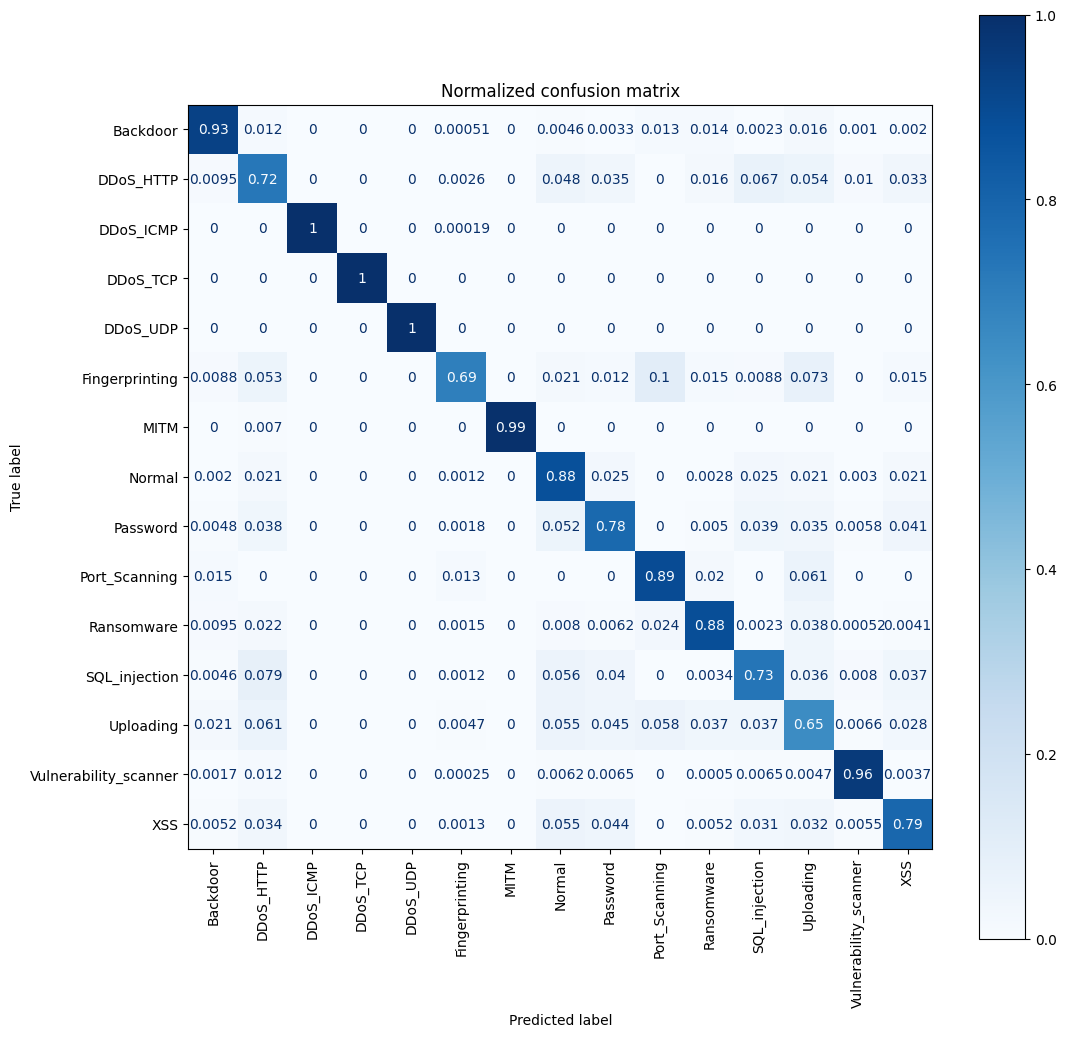

In [79]:

from sklearn.metrics import ConfusionMatrixDisplay

# titles_options = [
#     ("Confusion matrix, without normalization", None),
#     ("Normalized confusion matrix", "true"),
# ]

title='Normalized confusion matrix'

disp = ConfusionMatrixDisplay.from_estimator(
    clf,
    X_test,
    Y_test,
    # display_labels=Attack_type_classes,
    cmap=plt.cm.Blues,
    normalize='true',
)
disp.ax_.set_title(title)
disp.figure_.set_size_inches(12, 12, forward=True)
plt.xticks(rotation=90)
plt.show()

In [177]:

# tdf = df.drop([target_label_15_class, target_label_15_class_cat, target_label_2_class], axis=1, inplace=False).copy()
# # print(tdf.head())
# # df[target_label_15_class_cat], Attack_type_classes = pd.factorize(df[target_label_15_class])
# tdf['attack-type'], Attack_type_classes = pd.factorize(df[target_label_15_class])


# corr = tdf.corr()

# mask = np.triu(np.ones_like(corr, dtype=bool))
# cmap = sns.diverging_palette(230, 20, as_cmap=True)
# sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
#             square=True, linewidths=.5, cbar_kws={"shrink": .5})





